100%|██████████| 20000/20000 [01:29<00:00, 223.56it/s]


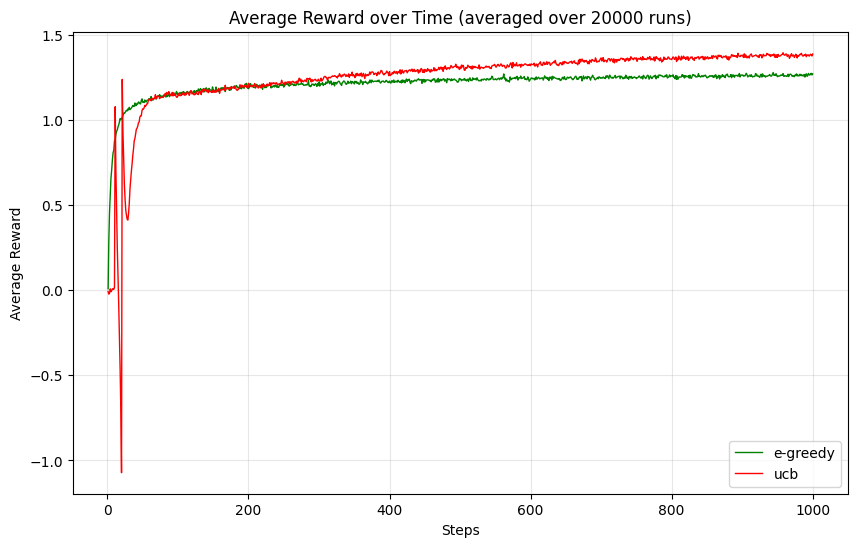

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

NUM_RUNS = 20000
NUM_STEPS = 1000
K = 10

def choose_action(epsilon, estimated_action_values):
    if np.random.rand() < epsilon:
        return np.random.randint(K)
    else:
        return np.argmax(estimated_action_values)

def choose_action_ucb(estimated_action_values, visit_counts, t, c):
    if np.any(visit_counts == 0):
        zero_idxs = np.flatnonzero(visit_counts == 0)
        return np.random.choice(zero_idxs)
    ucb_values = estimated_action_values + c * np.sqrt(np.log(t) / visit_counts)
    return np.argmax(ucb_values)

def sample_reward(index, true_action_values):
    return np.random.randn() + true_action_values[index]

def run_simulation(epsilon, alpha, initial_av_est, c=None):
    
    true_action_values = np.random.randn(K)
    rewards = []

    estimated_action_values = np.array([initial_av_est] * K)
    visit_counts = np.zeros(K)

    for i in range(NUM_STEPS):
        if c is None:
            action = choose_action(epsilon, estimated_action_values)
        else:
            action = choose_action_ucb(estimated_action_values, visit_counts, i+1, c)
        reward = sample_reward(action, true_action_values)
        visit_counts[action] += 1
        if alpha == 'avg':
            estimated_action_values[action] += (1 / visit_counts[action]) * (reward - estimated_action_values[action])
        else:
            estimated_action_values[action] += alpha * (reward - estimated_action_values[action])
        rewards.append(reward)

    return rewards

def get_simulation_results(epsilon, alpha='avg', initial_av_est=0.0, c=None):
    all_rewards = []
    for i in tqdm(range(NUM_RUNS)):
        rewards = run_simulation(epsilon, alpha, initial_av_est, c)
        all_rewards.append(rewards)
    
    all_rewards = np.array(all_rewards)
    average_reward_per_step = np.mean(all_rewards, axis=0)
    average_reward_over_last_1000 = np.mean(average_reward_per_step[-1000:])
    return average_reward_per_step, average_reward_over_last_1000

e_greedy, _ = get_simulation_results(epsilon=0.0, alpha=0.1, initial_av_est=0.0, c=None)
ucb, _ = get_simulation_results(epsilon=0.1, alpha=0.1, initial_av_est=0.0, c=2)

plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_STEPS + 1), e_greedy, 'g-', linewidth=1, label='e-greedy')
plt.plot(range(1, NUM_STEPS + 1), ucb, 'r-', linewidth=1, label='ucb')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time (averaged over ' + str(NUM_RUNS) + ' runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

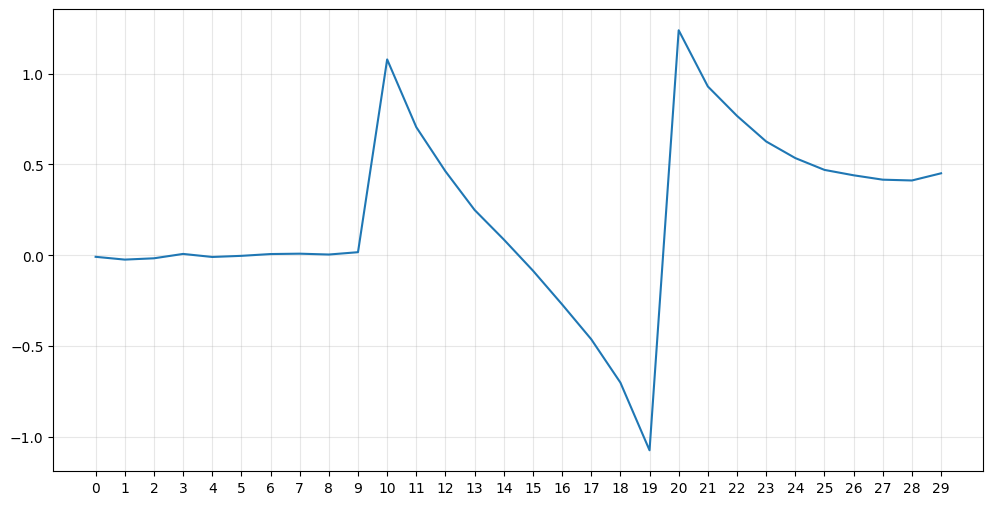

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(ucb[:30])
plt.grid(True, which='both', axis='both', alpha=0.3)
plt.xticks(range(30))
plt.show()

100%|██████████| 20000/20000 [00:25<00:00, 797.92it/s]


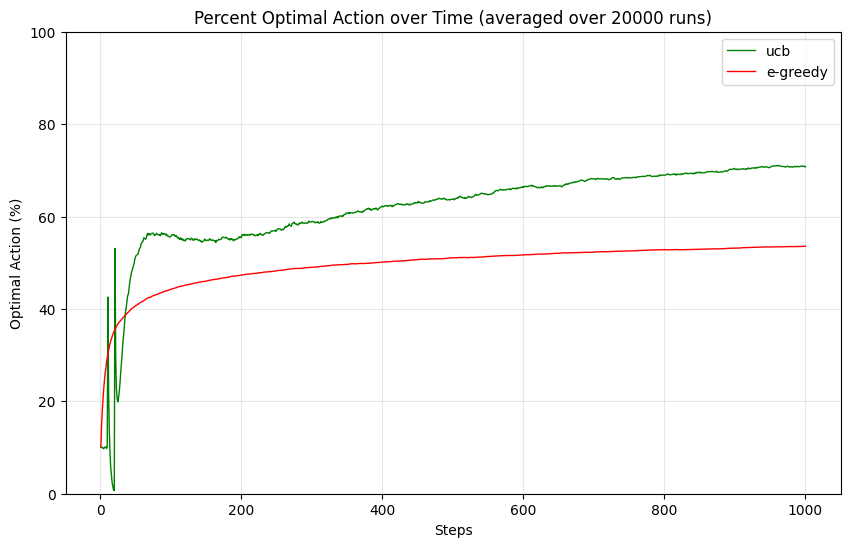

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

NUM_RUNS = 20000
NUM_STEPS = 1000
K = 10

def choose_action(epsilon, estimated_action_values):
    if np.random.rand() < epsilon:
        return np.random.randint(K)
    else:
        return np.argmax(estimated_action_values)

def choose_action_ucb(estimated_action_values, visit_counts, t, c):
    if np.any(visit_counts == 0):
        zero_idxs = np.flatnonzero(visit_counts == 0)
        return np.random.choice(zero_idxs)
    ucb_values = estimated_action_values + c * np.sqrt(np.log(t) / visit_counts)
    return np.argmax(ucb_values)

def sample_reward(index, true_action_values):
    return np.random.randn() + true_action_values[index]

def run_simulation(epsilon, alpha, initial_av_est, c=None):
    true_action_values = np.random.randn(K)
    optimal_action = np.argmax(true_action_values)
    optimal_selected = []

    estimated_action_values = np.array([initial_av_est] * K, dtype=float)
    visit_counts = np.zeros(K, dtype=int)

    for i in range(NUM_STEPS):
        if c is None:
            action = choose_action(epsilon, estimated_action_values)
        else:
            action = choose_action_ucb(estimated_action_values, visit_counts, i+1, c)
        reward = sample_reward(action, true_action_values)
        visit_counts[action] += 1
        if alpha == 'avg':
            step_size = 1.0 / visit_counts[action]
            estimated_action_values[action] += step_size * (reward - estimated_action_values[action])
        else:
            estimated_action_values[action] += alpha * (reward - estimated_action_values[action])
        optimal_selected.append(1 if action == optimal_action else 0)

    return optimal_selected

def get_optimal_action_percentages(epsilon, alpha='avg', initial_av_est=0.0, c=None):
    all_flags = []
    for _ in tqdm(range(NUM_RUNS)):
        flags = run_simulation(epsilon, alpha, initial_av_est, c)
        all_flags.append(flags)
    all_flags = np.array(all_flags) 
    return np.mean(all_flags, axis=0) * 100.0

ucb_pct = get_optimal_action_percentages(epsilon=0.1, alpha=.1, initial_av_est=0.0, c=2)
e_greedy_pct = get_optimal_action_percentages(epsilon=0.0, alpha=.1, initial_av_est=0.0, c=None)

plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_STEPS + 1), ucb_pct, 'g-', linewidth=1, label='ucb')
plt.plot(range(1, NUM_STEPS + 1), e_greedy_pct, 'r-', linewidth=1, label='e-greedy')
plt.xlabel('Steps')
plt.ylabel('Optimal Action (%)')
plt.ylim(0, 100)
plt.title(f'Percent Optimal Action over Time (averaged over {NUM_RUNS} runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

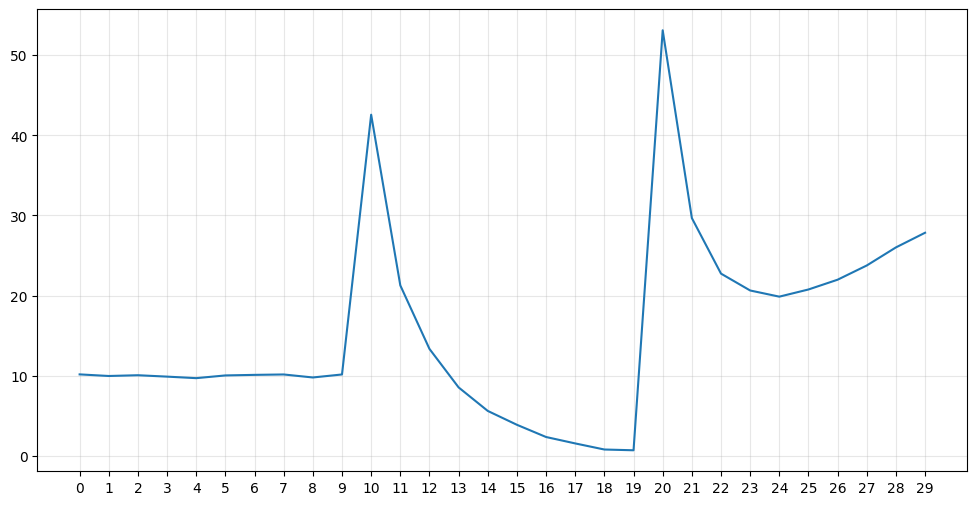

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(ucb_pct[:30])
plt.grid(True, which='both', axis='both', alpha=0.3)
plt.xticks(range(30))
plt.show()

- first ten steps will be randomly exploring the ten actions since we give an infinite weight to actions that have not been explored yet
- 11th step will often choose the optimal action, but we decrease from there since it has an additional visit, so our denominator is larger
- on the 21st step we will have usually explored all the actions twice, so we will often choose the optimal action again